In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [59]:
#reading the dataset file
df = pd.read_csv('/Users/shradhachoudhary/Downloads/Wine dataset.csv')

In [3]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
df['index_column'] = df.index

In [29]:
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,index_column
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,173
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,174
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,175
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,176


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [31]:
df.describe(include='all')

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,index_column
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,88.500000
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,51.528309
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,44.250000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,88.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,132.750000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,177.000000


In [32]:
#univariate analysis sense of what individual varialble is there-- first we check the output variable and make sure its balanced
df.groupby('class').count()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,index_column
class,,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59,59
2,71,71,71,71,71,71,71,71,71,71,71,71,71,71
3,48,48,48,48,48,48,48,48,48,48,48,48,48,48


In [33]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline ', 'index_column'],
      dtype='object')

<Axes: xlabel='Ash', ylabel='Count'>

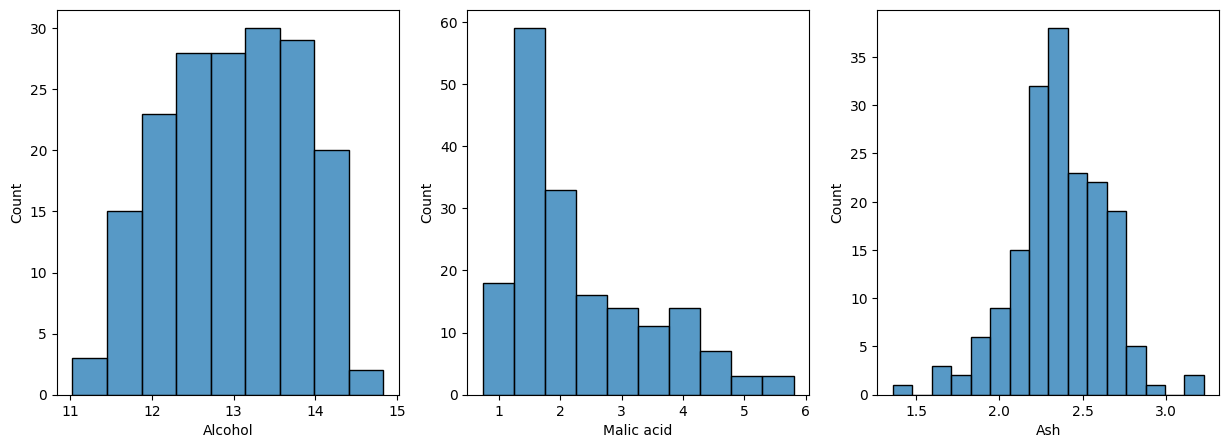

In [34]:
# check continuous variables first 

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
# for seassborn
sns.histplot(df['Alcohol'], ax=ax1)
sns.histplot(df['Malic acid'], ax=ax2)
sns.histplot(df['Ash'], ax=ax3)

<Axes: xlabel='Total phenols', ylabel='Count'>

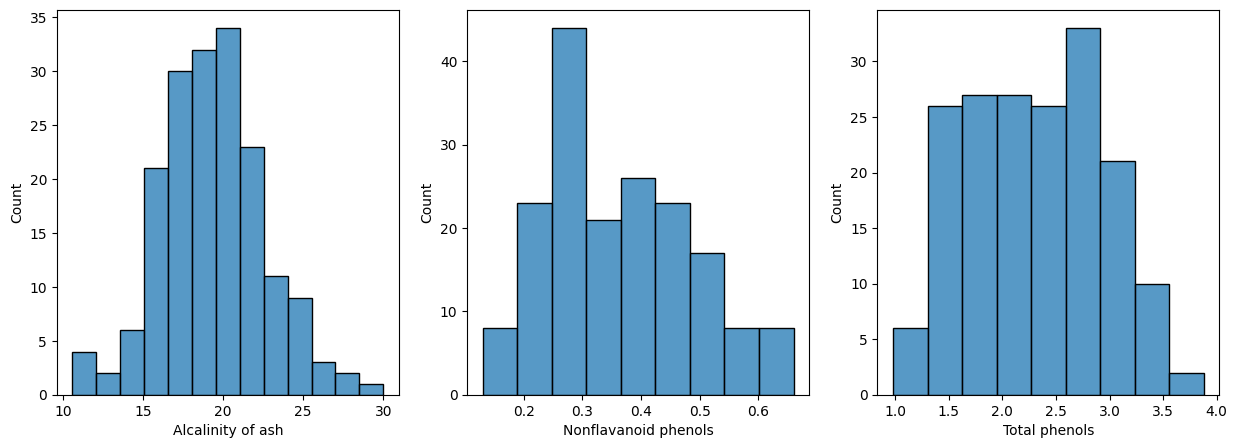

In [35]:
# check continuous variables first 

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
# for seassborn
sns.histplot(df['Alcalinity of ash'], ax=ax1)
sns.histplot(df['Nonflavanoid phenols'], ax=ax2)
sns.histplot(df['Total phenols'], ax=ax3)

<Axes: xlabel='Proanthocyanins', ylabel='Count'>

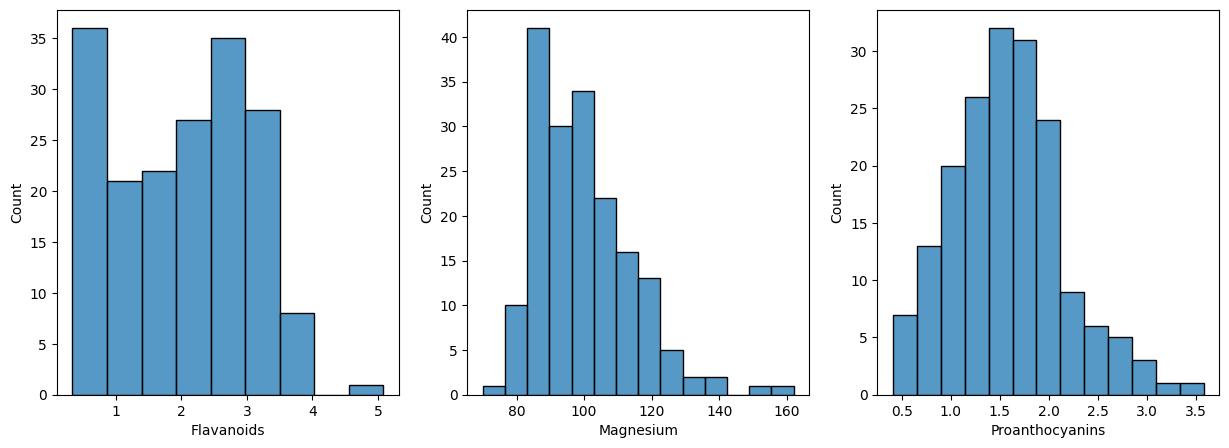

In [36]:
# check continuous variables first 

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
# for seassborn
sns.histplot(df['Flavanoids'], ax=ax1)
sns.histplot(df['Magnesium'], ax=ax2)
sns.histplot(df['Proanthocyanins'], ax=ax3)

<Axes: xlabel='OD280/OD315 of diluted wines', ylabel='Count'>

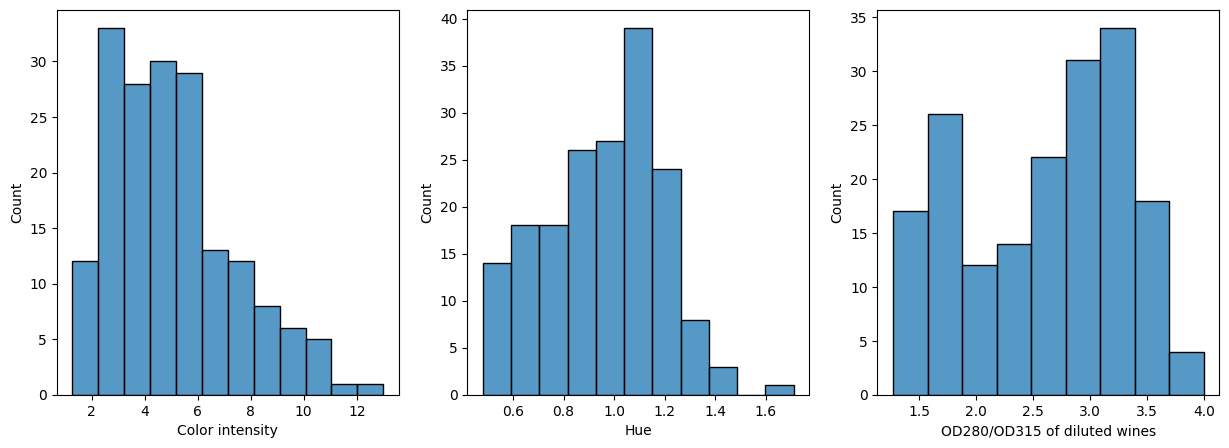

In [37]:
# check continuous variables first 

import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
# for seassborn
sns.histplot(df['Color intensity'], ax=ax1)
sns.histplot(df['Hue'], ax=ax2)
sns.histplot(df['OD280/OD315 of diluted wines'], ax=ax3)


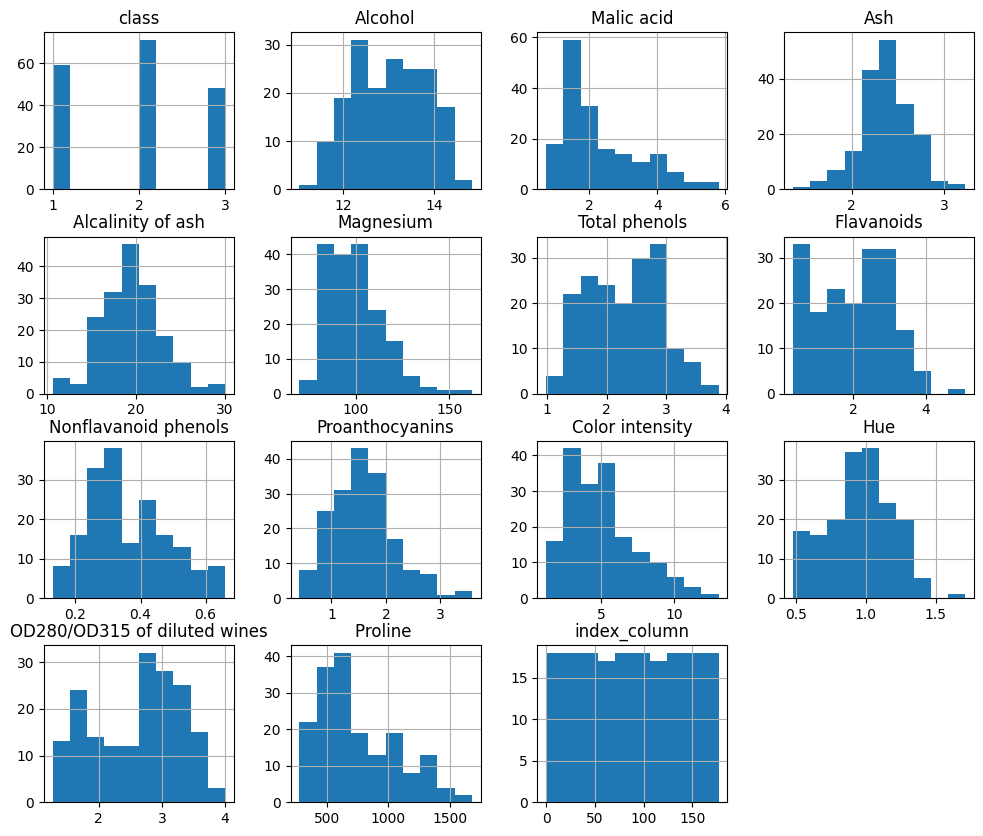

In [38]:
# Histograms
df.hist(figsize=(12, 10)) # we can quickly create all histograms at once 
plt.show()

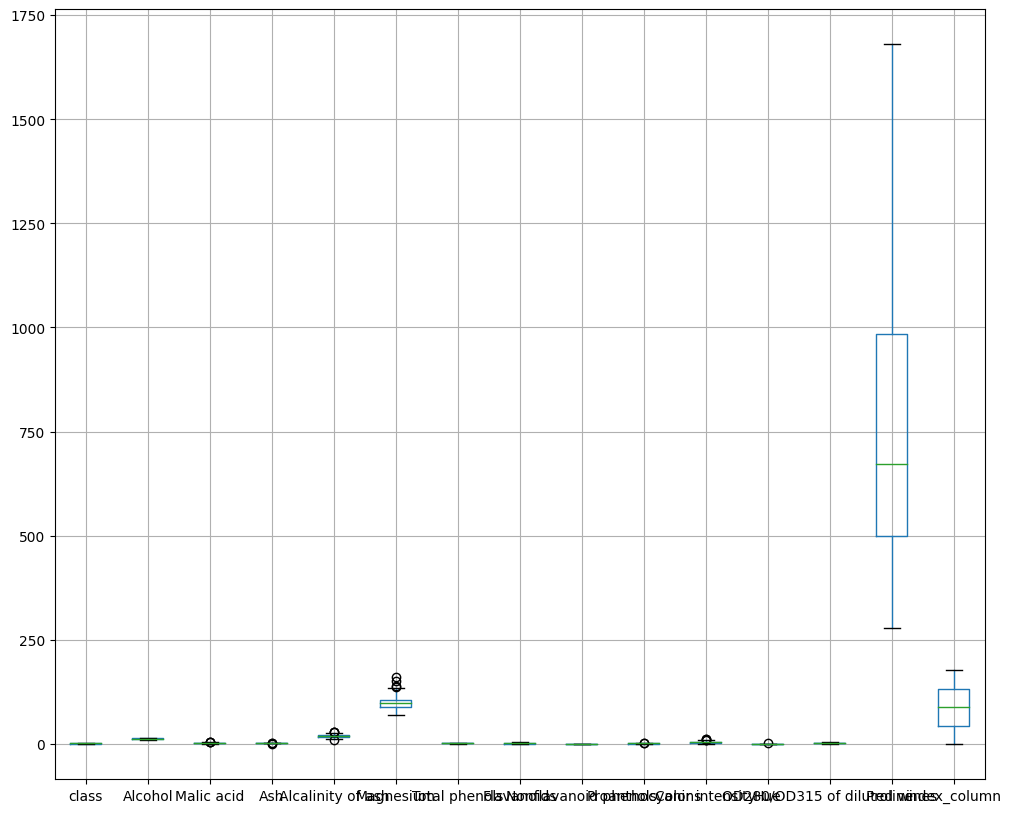

In [44]:
# Boxplot
df.boxplot(figsize=(12, 10)) # we can quickly create all histograms at once 
plt.show()

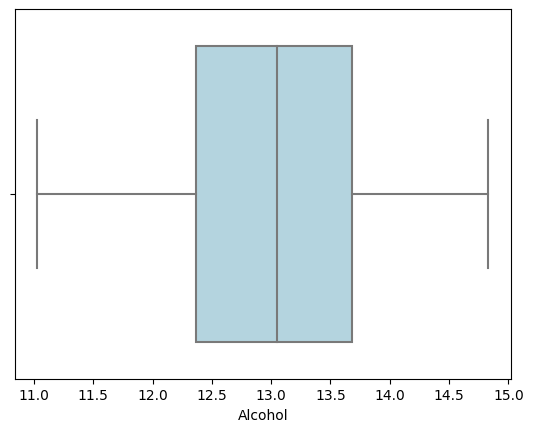

In [65]:
sns.boxplot(x = df['Alcohol'], color= '#ADD8E6')
plt.show()

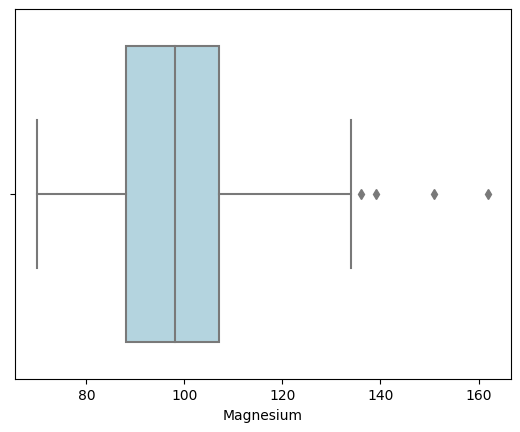

In [67]:
sns.boxplot(x = df['Magnesium'], color= '#ADD8E6')
plt.show()

In [70]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

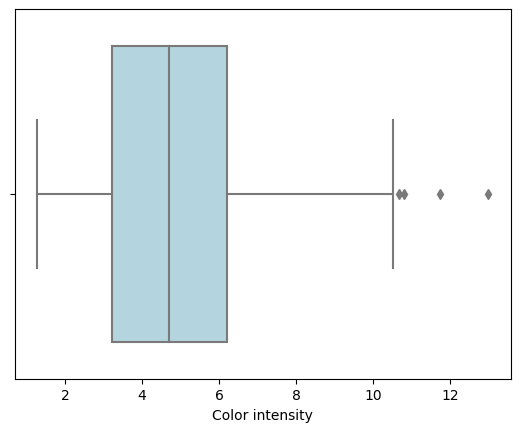

In [71]:
sns.boxplot(x = df['Color intensity'], color= '#ADD8E6')
plt.show()

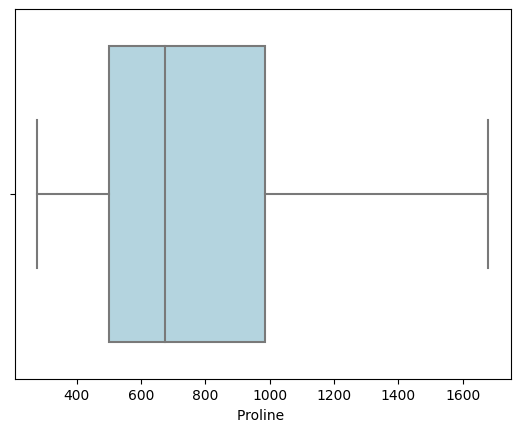

In [74]:
sns.boxplot(x = df['Proline '], color= '#ADD8E6')
plt.show()

<Axes: >

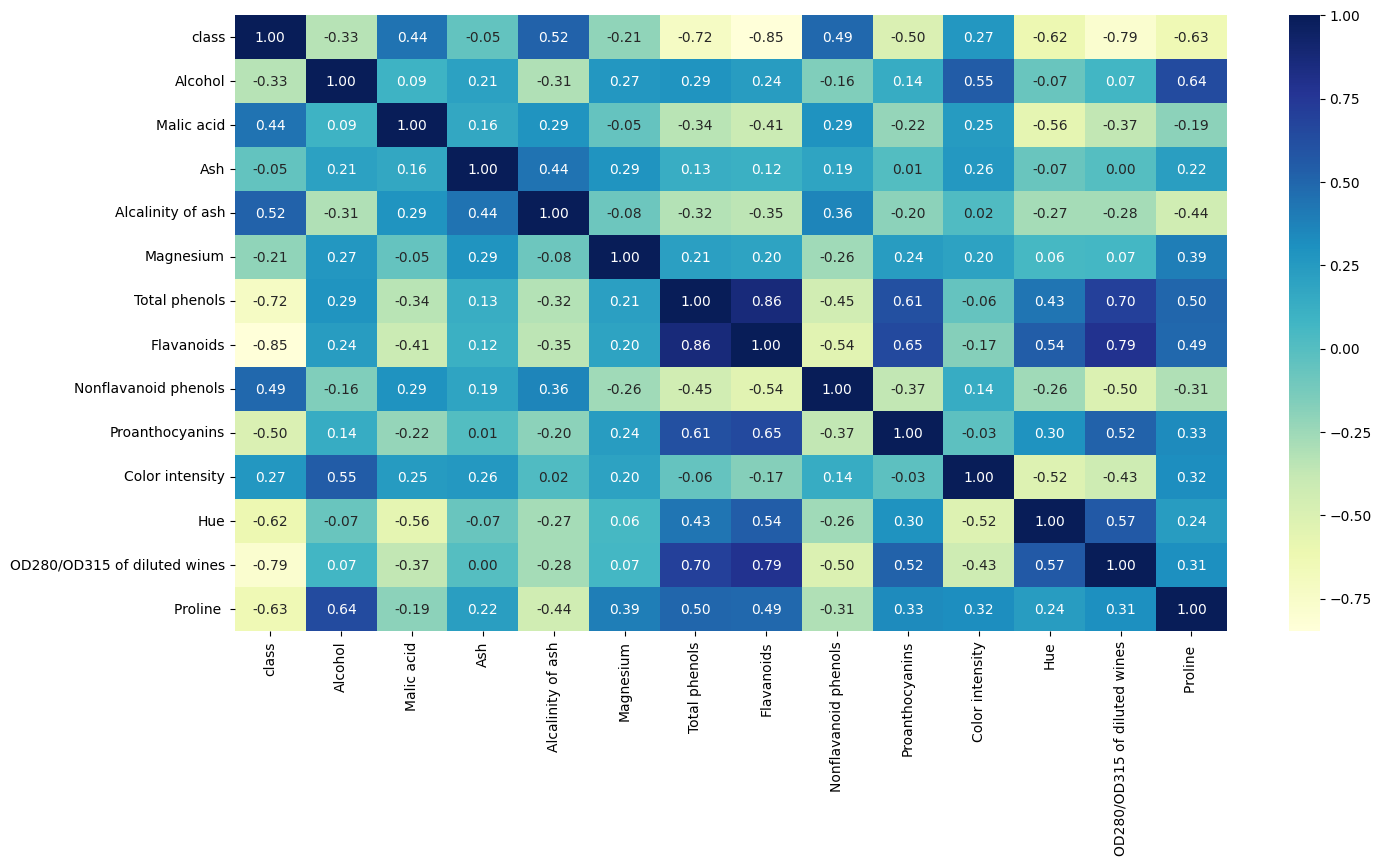

In [75]:
plt.figure(figsize= (16, 8))
sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

In [77]:
df = df[(df['Color intensity']<10.5)]
df = df[(df['Magnesium']<130.5)]
df.reset_index(drop=True,inplace=True)

In [78]:
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
163,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
164,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
165,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [79]:
scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df),columns= df.columns)

In [80]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-1.178259,1.506992,-0.575214,0.248635,-1.163247,2.420563,0.799490,0.996195,-0.673308,1.329270,0.340695,0.359625,1.824142,0.997097
1,-1.178259,0.243502,-0.513102,-0.825531,-2.515063,0.154771,0.559786,0.697962,-0.837938,-0.504892,-0.264838,0.404801,1.086707,0.950225
2,-1.178259,0.194434,0.001541,1.137600,-0.241553,0.238690,0.799490,1.175135,-0.508678,2.273591,0.359918,0.314448,0.760533,1.372075
3,-1.178259,1.678729,-0.362258,0.507917,-0.794569,1.245708,2.477414,1.423663,-1.002569,1.129510,1.378750,-0.453548,1.157614,2.293896
4,-1.178259,0.292569,0.205623,1.878404,0.495801,1.665299,0.799490,0.628374,0.232158,0.475749,-0.293672,0.359625,0.420178,-0.034092


In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df)
df2 = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,167.0,0.000000e+00,2.391359,-4.477633,-2.382677,-0.073918,2.168240,4.591797
col2,167.0,-4.254747e-17,1.641707,-3.389675,-1.159541,-0.418405,1.457734,4.042018
col3,167.0,2.127373e-17,1.217482,-4.758847,-0.786124,-0.068147,0.674897,5.453708


In [84]:
df2.head()

,col1,col2,col3
0,3.648630,-1.609395,0.032859
1,2.504804,0.257462,-1.979523
2,2.858771,-0.851469,1.132378
3,4.069071,-2.696493,-0.041764
4,1.455408,-0.971018,2.209202


In [62]:
 def plot_bivariate_panel(vars_name, var_ref, data, n_cols=3):

    from math import ceil
    
    n_rows = ceil(len(vars_name) / n_cols)
    
    plt.figure(figsize=(7 * n_cols, 4 * n_rows))
    for idx, var in enumerate(vars_name, 1):
        
        mean = df.groupby(by=var).mean()[[var_ref]].reset_index()
        std = df.groupby(by=var).std()[var_ref].fillna(0)

        plt.subplot(n_rows, n_cols, idx)        
        sns.scatterplot(x=var, y=var_ref, data=mean)
        plt.ylabel(f'Mean {var_ref}') 

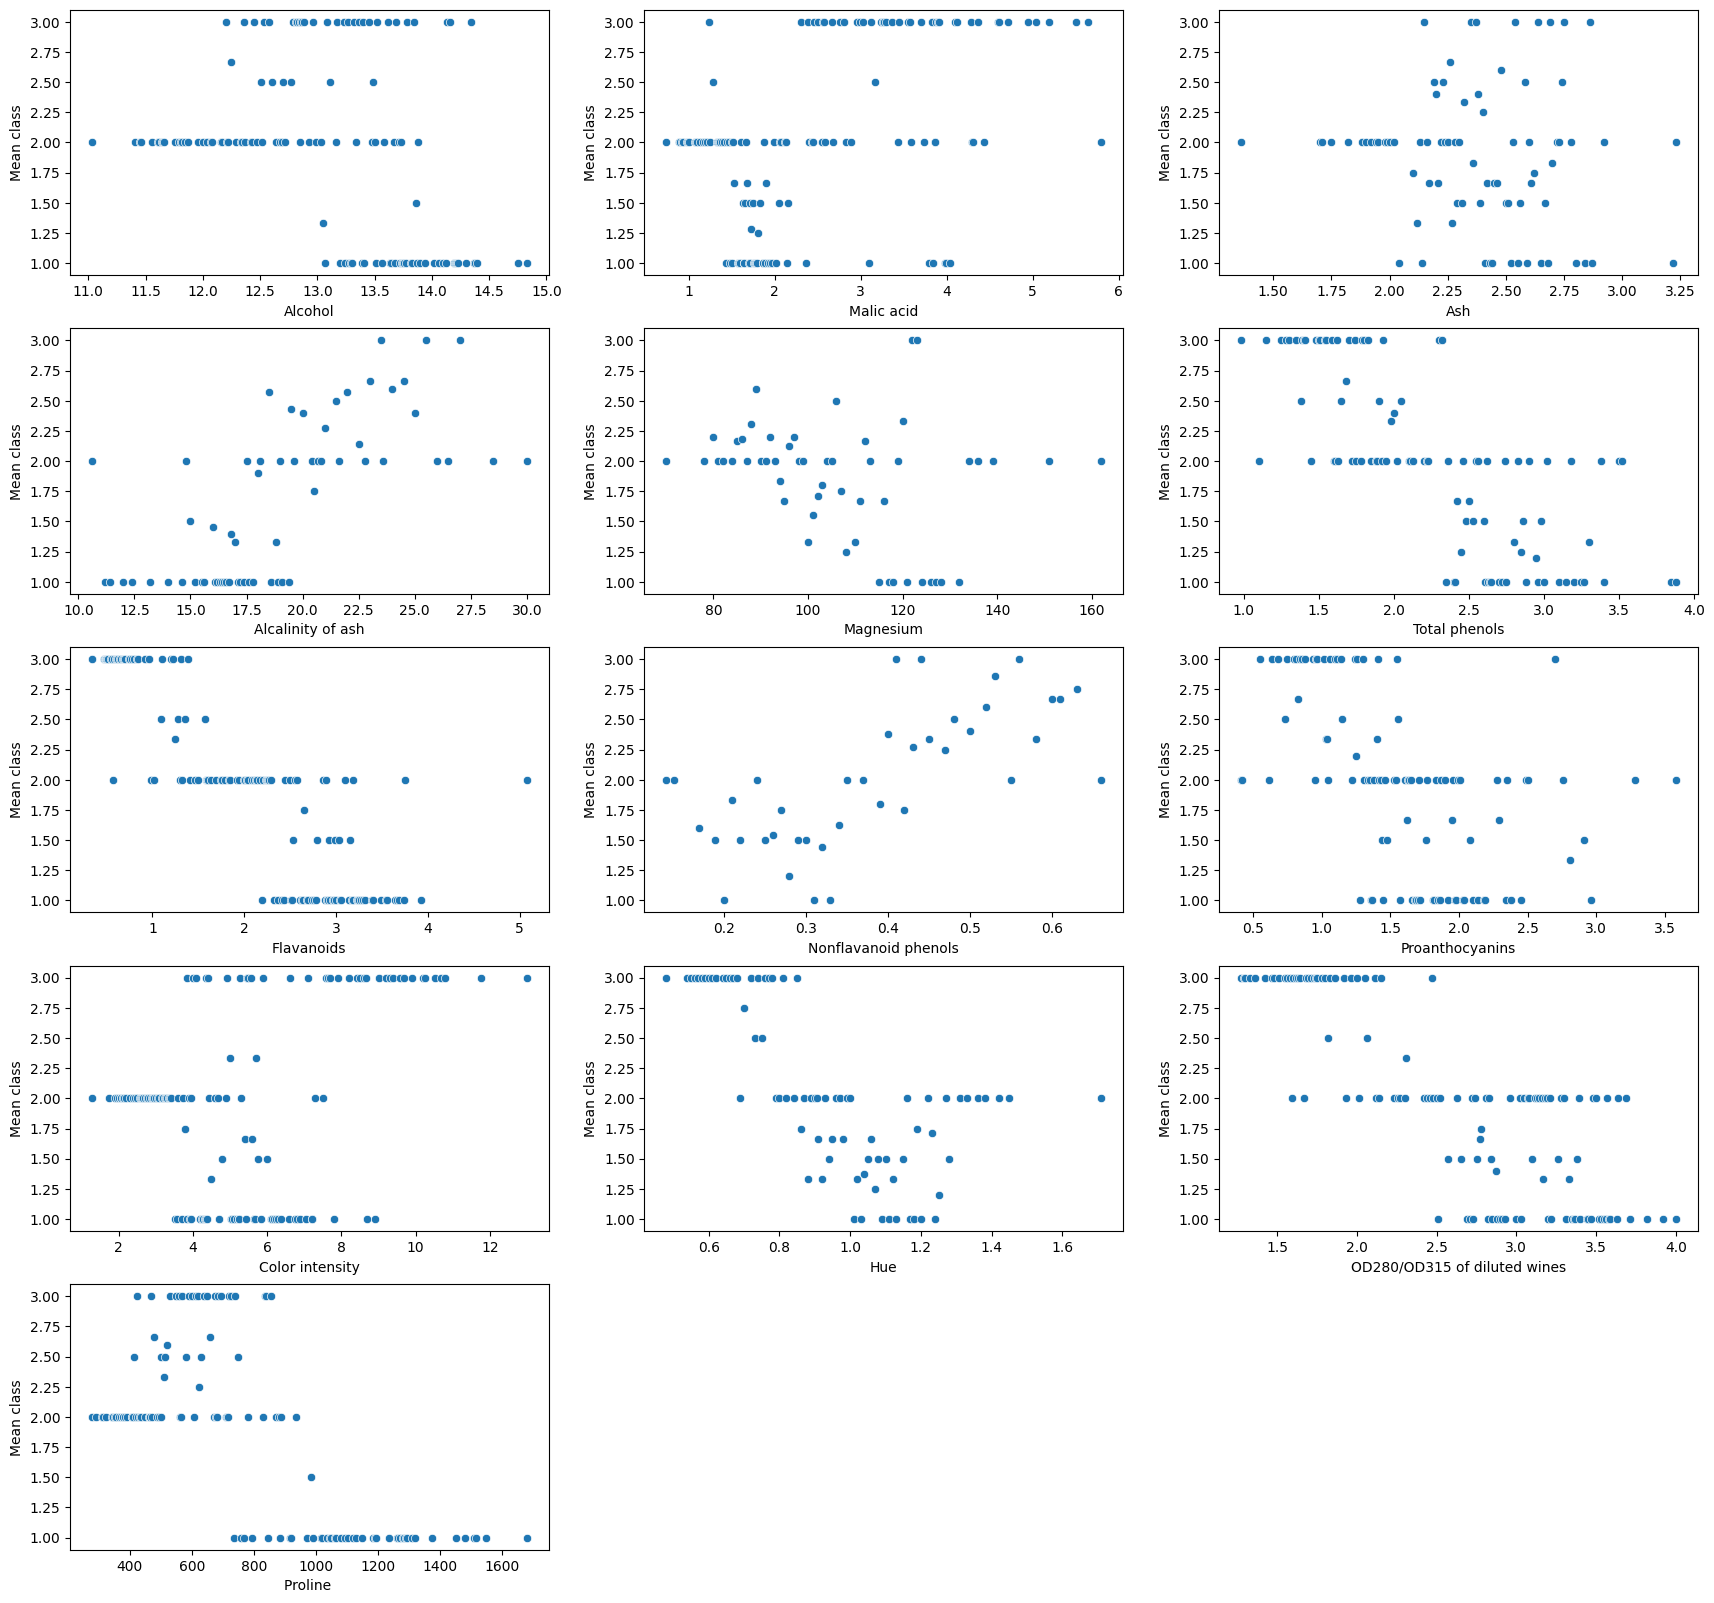

In [63]:
plot_bivariate_panel(df.drop(columns=['class']).columns, 'class', df)

In [39]:
df.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline ', 'index_column'],
      dtype='object')

In [61]:
df.groupby(['Alcohol','class']).count().unstack()


Malic acid           Ash          Alcalinity of ash            
class            1    2   3    1    2   3                 1    2   3   
Alcohol                                                                
11.03          NaN  1.0 NaN  NaN  1.0 NaN               NaN  1.0 NaN  \
11.41          NaN  1.0 NaN  NaN  1.0 NaN               NaN  1.0 NaN   
11.45          NaN  1.0 NaN  NaN  1.0 NaN               NaN  1.0 NaN   
11.46          NaN  1.0 NaN  NaN  1.0 NaN               NaN  1.0 NaN   
11.56          NaN  1.0 NaN  NaN  1.0 NaN               NaN  1.0 NaN   
...            ...  ...  ..  ...  ...  ..               ...  ...  ..   
14.37          1.0  NaN NaN  1.0  NaN NaN               1.0  NaN NaN   
14.38          2.0  NaN NaN  2.0  NaN NaN               2.0  NaN NaN   
14.39          1.0  NaN NaN  1.0  NaN NaN               1.0  NaN NaN   
14.75          1.0  NaN NaN  1.0  NaN NaN               1.0  NaN NaN   
14.83          1.0  NaN NaN  1.0  NaN NaN               1.0  NaN NaN   

        Magnesium  ... Color intensity  Hue            
class           1  ...               3    1    2   3   
Alcohol            ...                                 
11.03         NaN  ...             NaN  NaN  1.0 NaN  \
11.41         NaN  ...             NaN  NaN  1.0 NaN   
11.45         NaN  ...             NaN  NaN  1.0 NaN   
11.46         NaN  ...             NaN  NaN  1.0 NaN   
11.56         NaN  ...             NaN  NaN  1.0 NaN   
...           ...  ...             ...  ...  ...  ..   
14.37         1.0  ...             NaN  1.0  NaN NaN   
14.38         2.0  ...             NaN  2.0  NaN NaN   
14.39         1.0  ...             NaN  1.0  NaN NaN   
14.75         1.0  ...             NaN  1.0  NaN NaN   
14.83         1.0  ...             NaN  1.0  NaN NaN   

        OD280/OD315 of diluted wines          Proline            
class                              1    2   3        1    2   3  
Alcohol                                                          
11.03                            NaN  1.0 NaN      NaN  1.0 NaN  
11.41                            NaN  1.0 NaN      NaN  1.0 NaN  
11.45                            NaN  1.0 NaN      NaN  1.0 NaN  
11.46                            NaN  1.0 NaN      NaN  1.0 NaN  
11.56                            NaN  1.0 NaN      NaN  1.0 NaN  
...                              ...  ...  ..      ...  ...  ..  
14.37                            1.0  NaN NaN      1.0  NaN NaN  
14.38                            2.0  NaN NaN      2.0  NaN NaN  
14.39                            1.0  NaN NaN      1.0  NaN NaN  
14.75                            1.0  NaN NaN      1.0  NaN NaN  
14.83                            1.0  NaN NaN      1.0  NaN NaN  

[126 rows x 36 columns]

<Axes: xlabel='class', ylabel='Ash'>

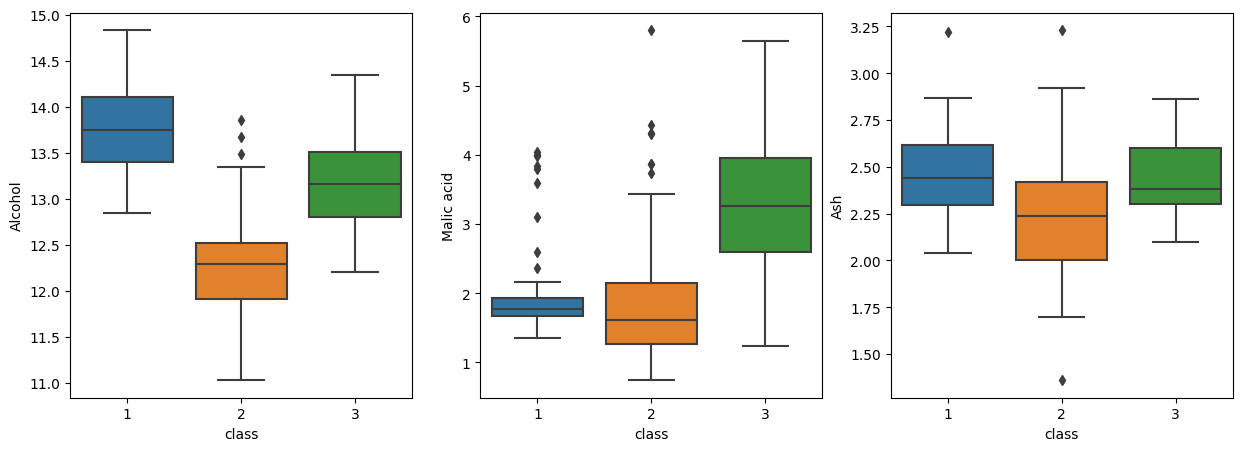

In [45]:
# check continuous variables first > age, work experience, family size > compare them to output variable

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='class',y='Alcohol', data=df, ax=ax1)
sns.boxplot(x='class',y='Malic acid',data=df, ax=ax2)
sns.boxplot(x='class',y='Ash', data=df, ax=ax3)

<Axes: xlabel='class', ylabel='Total phenols'>

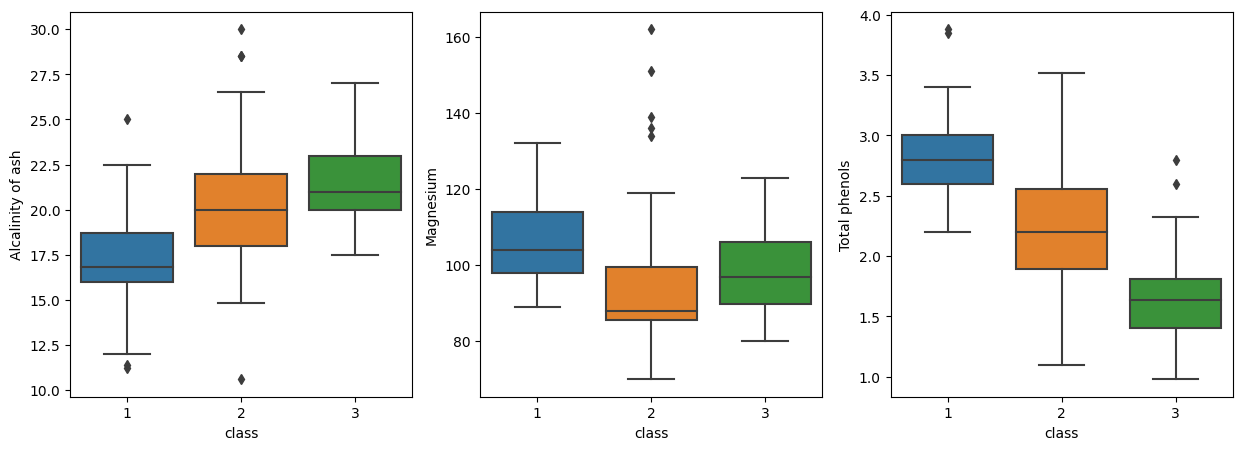

In [46]:
# check continuous variables first > age, work experience, family size > compare them to output variable

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='class',y='Alcalinity of ash', data=df, ax=ax1)
sns.boxplot(x='class',y='Magnesium',data=df, ax=ax2)
sns.boxplot(x='class',y='Total phenols', data=df, ax=ax3)

<Axes: xlabel='class', ylabel='Proanthocyanins'>

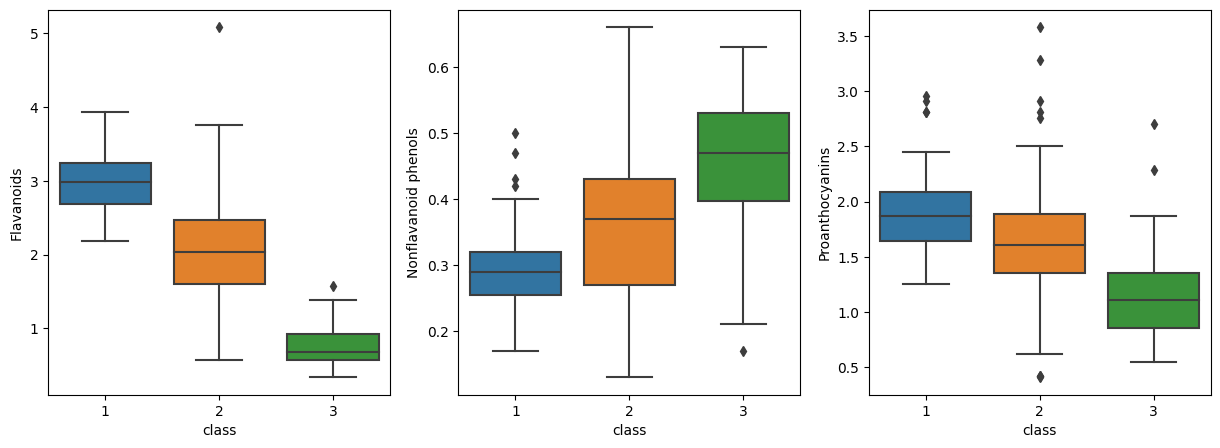

In [47]:
# check continuous variables first > age, work experience, family size > compare them to output variable

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='class',y='Flavanoids', data=df, ax=ax1)
sns.boxplot(x='class',y='Nonflavanoid phenols',data=df, ax=ax2)
sns.boxplot(x='class',y='Proanthocyanins', data=df, ax=ax3)

<Axes: xlabel='class', ylabel='OD280/OD315 of diluted wines'>

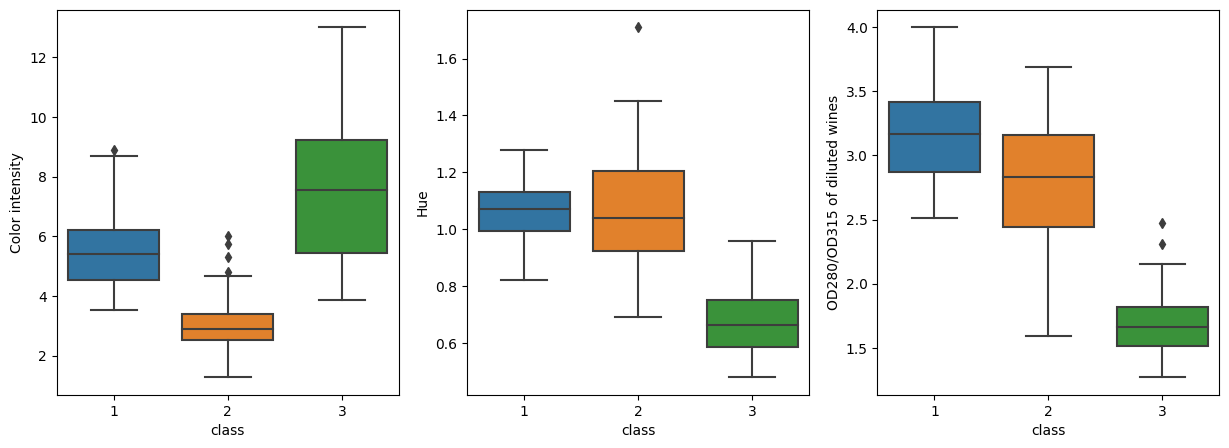

In [48]:
# check continuous variables first > age, work experience, family size > compare them to output variable

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
sns.boxplot(x='class',y='Color intensity', data=df, ax=ax1)
sns.boxplot(x='class',y='Hue',data=df, ax=ax2)
sns.boxplot(x='class',y='OD280/OD315 of diluted wines', data=df, ax=ax3)

In [52]:
print(df.corr())

                                 class   Alcohol  Malic acid       Ash   
class                         1.000000 -0.328222    0.437776 -0.049643  \
Alcohol                      -0.328222  1.000000    0.094397  0.211545   
Malic acid                    0.437776  0.094397    1.000000  0.164045   
Ash                          -0.049643  0.211545    0.164045  1.000000   
Alcalinity of ash             0.517859 -0.310235    0.288500  0.443367   
Magnesium                    -0.209179  0.270798   -0.054575  0.286587   
Total phenols                -0.719163  0.289101   -0.335167  0.128980   
Flavanoids                   -0.847498  0.236815   -0.411007  0.115077   
Nonflavanoid phenols          0.489109 -0.155929    0.292977  0.186230   
Proanthocyanins              -0.499130  0.136698   -0.220746  0.009652   
Color intensity               0.265668  0.546364    0.248985  0.258887   
Hue                          -0.617369 -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines -0.788230

class and malic acid, alcalinity of ash and class, alcalinity of ash and ash, non falvoured phenols and class, color intensity and alcohol, proline and acohol
dependent variables(malic acid, class, ash, alcohol)
independent variables(alcalinity of ash, non flavoured phenols, color intensity, proline)

In [55]:
# Separate variables into categorical and numerical based on data types
data_types = df.dtypes
categorical_vars = data_types[data_types == 'object'].index.tolist()
numerical_vars = data_types[data_types != 'object'].index.tolist()

In [54]:
print("Categorical Variables:")
print(categorical_vars)

print("\nNumerical Variables:")
print(numerical_vars)

Categorical Variables:
[]

Numerical Variables:
['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline ', 'index_column']


In [60]:
df[df['class']=='1'].describe(include='all')

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.head()



,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,index_column
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
